In [1]:
# importing data handling libraries
import pandas as pd
import numpy as np

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing data transformation libraries
from sklearn.decomposition import NMF

# importing model building algorithms
from sklearn.neighbors import NearestNeighbors

In [2]:
# Importing spotify data
data = pd.read_csv('spotify.csv', index_col=[0])

In [3]:
# Examining first five rows
data.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
# converting dataframe into array
X = data.values
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [9]:
# Non-Negative Matrix Factorization (NMF)
nmf = NMF(n_components=100, max_iter=100, random_state=200)
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=100,
  n_components=100, random_state=200, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [10]:
user_matrix = nmf.transform(X)
user_matrix.shape

(1000, 100)

In [11]:
song_matrix = nmf.components_
song_matrix.shape

(100, 5000)

In [12]:
song_matrix=song_matrix.T

In [56]:
song_matrix

array([[0.23257865, 0.26120841, 0.48576346, ..., 0.        , 0.        ,
        0.        ],
       [0.28666778, 0.        , 0.09358127, ..., 0.21990953, 0.37204496,
        0.21968891],
       [0.        , 0.15075862, 0.        , ..., 0.07416342, 0.08479278,
        0.1447322 ],
       ...,
       [0.43450893, 0.3531985 , 0.        , ..., 0.        , 0.        ,
        0.10815537],
       [0.50718476, 0.244407  , 0.17067294, ..., 0.05029539, 0.07632326,
        0.19074316],
       [0.39028082, 0.13910588, 0.17594348, ..., 0.00711704, 0.23741945,
        0.29070006]])

## Step in Building the System
### Step 1: Consider recm songs to user 1.
### Step 2: Find the eulcidean distance bw user 1 and all the other users.
### Step 3: Find out the songs heard frequenly by the closest 5 users.
### Step 4: Recm these to user 1.

In [10]:
#Calculating eD
def cal_ed(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2) for x in range(len(u1))]),0.5)

In [11]:
cal_ed(user_matrix[0],user_matrix[1])

12.487014397395448

In [12]:
#Calculating distances from base user to all the users
def caldistfromusers(user,user_matrix):
    import sys
    distance = []
    for i in range(len(user_matrix)):
        if user != i:
            distance.append(cal_ed(user_matrix[user],user_matrix[i]))
        else:
            distance.append(sys.float_info.max)
    return distance

In [13]:
dist_user1=caldistfromusers(0,user_matrix)

In [14]:
#Finsing the closest 5 user at thier indexes
user_index=np.argsort(dist_user1)[0:5]

In [15]:
user_index

array([562, 962, 183, 442, 463], dtype=int64)

In [16]:
# Finding the songs head by the closest users
for i in user_index:
    print("Songs heard by the user in index " , i ," are")
    temp=pd.DataFrame(data.iloc[i])
    print(temp[temp.values !=0].index)

Songs heard by the user in index  562  are
Index(['song_1', 'song_2', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4995', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4688)
Songs heard by the user in index  962  are
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4685)
Songs heard by the user in index  183  are
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', '

In [22]:
# Get top5 songs
def gettop5songs(user_index, data):
    temp_df = data.iloc[user_index]
    # print(temp_df.head(2))
    dict1 = temp_df.max().to_dict()
    # print(dict1)
    sorted_dict = sorted(dict1.items(), key=lambda kv: (
        kv[1], kv[0]), reverse=True)[:5]
    # print(dict1.items())
    return [x[0] for x in sorted_dict]

In [23]:
gettop5songs(user_index,data)

['song_999', 'song_997', 'song_993', 'song_990', 'song_984']

In [28]:
# Recommend the songs
def recsongs(user_index, user_matrix, data):
    dist_from_user = caldistfromusers(user_index, user_matrix)
    closest5user = np.argsort(dist_from_user)[0:5]
    return gettop5songs(closest5user, data)

In [16]:
# recsongs(15,user_matrix,data)
from sklearn.cluster import KMeans

In [30]:
#K means clusturing

withinclusture_mean_sqr_error = {}
for k in range(1,40):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(song_matrix)
    withinclusture_mean_sqr_error[k]=kmeans.inertia_

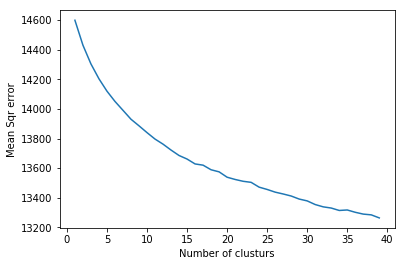

In [31]:
# elbow curve
plt.figure()
plt.plot(list(withinclusture_mean_sqr_error.keys()),
         list(withinclusture_mean_sqr_error.values()))
plt.xlabel("Number of clusturs")
plt.ylabel("Mean Sqr error")
plt.show()

In [62]:
# prediction are heppening from song point of view and not user point of view


def ReturnSongsInCluster(data_columns, n_cluster, sng_matrix, song_name, n_recommendation):

    kmeans = KMeans(n_clusters=n_cluster, max_iter=1000).fit(
        sng_matrix)  # Make clustures

    # Get the index of the song on basis of which rec happens
    index_in_song = data.columns.to_list().index(song_name)

    # take the listeing values from the song matrix and seprate it from the rest
    song_vector = sng_matrix[index_in_song]

    # Check to which clusture does this song belongs.
    all_songs_in_cluster = list(kmeans.predict(sng_matrix))

    songs_in_selected_cluster = [x for x in range(len(
        all_songs_in_cluster)) if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    # take up all the songs that belong to this clusture

    # Get the song names from the matrix on basis of the previous output
    song_cluster = sng_matrix[songs_in_selected_cluster]

    # KNN for neighboring songs
    knn = NearestNeighbors(n_neighbors=n_recommendation)

    knn.fit(song_cluster)  # Fit the clusture

    # predict the top 1 song on basis of the times heard decomposed value
    recommended_songs = knn.kneighbors([sng_matrix[index_in_song]])[1]

    return data_columns[recommended_songs]

In [63]:
ReturnSongsInCluster(data.columns, 23, song_matrix, 'song_5', 5)

Index([['song_1', 'song_61', 'song_16', 'song_55', 'song_79']], dtype='object')

In [64]:
data.columns

Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=5000)